# Routine to look at when soundings are available at PABR site


https://weather.uwyo.edu/upperair/sounding.html

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})
import xarray as xr
import pandas as pd
from datetime import datetime
from datetime import timedelta

# meteorology - specific
from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir

import sys
sys.path.append('./scripts/')

from LIB_dates import generate_date_list
from LIB_request_WUA_sounding import check_for_WUA_soundings
from LIB_sounding_analysis import interpolate_soundings

### look at when requested [Wyoming Upper Air sounding](https://weather.uwyo.edu/upperair/sounding.html) data was available

In [2]:


def grab_sounding_dates(year = 2000, hours = [0,6,12,18]):
    
    
    # open csv file corresponding to year
    ds = pd.read_csv(f'./sounding_checks/checked_{year}0101Z00_{year}1231Z23_hourly6.csv')
    
    doy = np.array([])
    sou = np.array([])
    
    # pull out dates from soundings (as day of year)
    for dd, date in enumerate(ds.date):
    
        # convert to datetime
        date_asdatetime = pd.to_datetime(date)

        # find julian day, with hour as decimal
        DOY = int(date_asdatetime.strftime('%j')) + int(date_asdatetime.strftime('%H'))/24

        # save specified hours of day
        if (DOY%1)*24 in hours:
            doy = np.append(doy, DOY)
            sou = np.append(sou, ds.sounding_exist[dd])
            
    return doy, sou

In [3]:
doy20, sou20 = grab_sounding_dates(year = 2020, hours = [0,6,12,18])
doy19, sou19 = grab_sounding_dates(year = 2019, hours = [0,6,12,18])

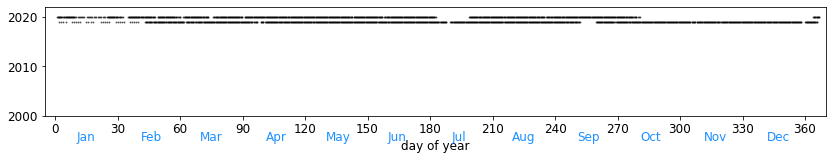

In [5]:
fig, ax = plt.subplots(figsize=(14,2))

doy_soundings19 = doy19[sou19==1]
year_soundings19 = np.full_like(doy_soundings19, 2019)
plt.scatter(doy_soundings19, year_soundings19, s=1, c='k', alpha=0.5, )

doy_soundings20 = doy20[sou20==1]
year_soundings20 = np.full_like(doy_soundings20, 2020)
plt.scatter(doy_soundings20, year_soundings20, s=1, c='k', alpha=0.5, )


ax.set_xlim(-5,370)
ax.set_ylim(2000,2022)
ax.set_xticks(np.arange(0,361,30))
ax.set_xlabel('day of year')


# generate mid month labels
label_doys = []
label_names = []
for month_num in range(1,13):
    if month_num < 6:
        midmonth = 15
    else:
        midmonth = 12
    label_doys.append(int(datetime(year = 2020, month = month_num, day = midmonth).strftime('%j')))
    label_names.append(datetime(year = 2020, month = month_num, day = midmonth).strftime('%B')[:3])
for ll, label in enumerate(label_names):
    ax.text(label_doys[ll], 1995, label, c='dodgerblue', horizontalalignment='center')
    
    
# ax.set_xticklabels(label_names)